In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import pandas_datareader as pdr
key="961705e28c14170672d45212990087314a455244"


In [2]:
df = pdr.get_data_tiingo('GOOG', api_key=key)
df.to_csv('Google.csv')
df=pd.read_csv('Google.csv')

/usr/local/lib/python3.7/dist-packages/pandas_datareader/tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  return pd.concat(dfs, self._concat_axis)


,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2017-08-14 00:00:00+00:00,922.67,924.6680,918.1900,922.53,1047828,46.1335,46.233400,45.909500,46.1265,20956560,0.0,1.0
1,GOOG,2017-08-15 00:00:00+00:00,922.22,926.5499,919.8200,924.23,873070,46.1110,46.327495,45.991000,46.2115,17461400,0.0,1.0
2,GOOG,2017-08-16 00:00:00+00:00,926.96,932.7000,923.4450,925.29,988604,46.3480,46.635000,46.172250,46.2645,19772080,0.0,1.0
3,GOOG,2017-08-17 00:00:00+00:00,910.98,926.8600,910.9800,925.78,1218963,45.5490,46.343000,45.549000,46.2890,24379260,0.0,1.0
4,GOOG,2017-08-18 00:00:00+00:00,910.67,915.2750,907.1543,910.31,1333572,45.5335,45.763750,45.357715,45.5155,26671440,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,GOOG,2022-08-08 00:00:00+00:00,118.14,120.8600,117.8300,119.12,17061112,118.1400,120.860000,117.830000,119.1200,17061112,0.0,1.0
1255,GOOG,2022-08-09 00:00:00+00:00,117.50,118.2000,116.5600,117.99,15424257,117.5000,118.200000,116.560000,117.9900,15424257,0.0,1.0
1256,GOOG,2022-08-10 00:00:00+00:00,120.65,121.7800,119.3600,119.59,20497021,120.6500,121.780000,119.360000,119.5900,20497021,0.0,1.0
1257,GOOG,2022-08-11 00:00:00+00:00,119.82,122.3402,119.5500,122.08,16671627,119.8200,122.340200,119.550000,122.0800,16671627,0.0,1.0


In [3]:
df1=df.reset_index()['close']
df1

0       922.67
1       922.22
2       926.96
3       910.98
4       910.67
         ...  
1254    118.14
1255    117.50
1256    120.65
1257    119.82
1258    122.65
Name: close, Length: 1259, dtype: float64

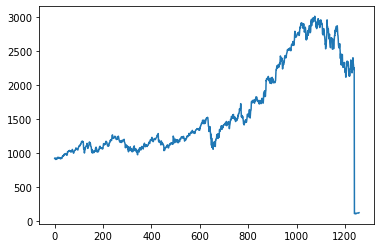

In [4]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

print(df1)


[[0.2809567 ]
 [0.280802  ]
 [0.28243157]
 ...
 [0.00522907]
 [0.00494372]
 [0.00591665]]


In [6]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [7]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [8]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [9]:
print(X_train.shape), print(y_train.shape)

(717, 100)
(717,)


(None, None)

In [10]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [11]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)


Epoch 1/100
12/12 [==============================] - 26s 728ms/step - loss: 0.0386 - val_loss: 0.0988
Epoch 2/100
12/12 [==============================] - 5s 383ms/step - loss: 0.0048 - val_loss: 0.0403
Epoch 3/100
12/12 [==============================] - 2s 180ms/step - loss: 0.0019 - val_loss: 0.0792
Epoch 4/100
12/12 [==============================] - 2s 178ms/step - loss: 0.0012 - val_loss: 0.0622
Epoch 5/100
12/12 [==============================] - 2s 177ms/step - loss: 0.0010 - val_loss: 0.0559
Epoch 6/100
12/12 [==============================] - 2s 177ms/step - loss: 9.2498e-04 - val_loss: 0.0551
Epoch 7/100
12/12 [==============================] - 2s 180ms/step - loss: 8.5459e-04 - val_loss: 0.0478
Epoch 8/100
12/12 [==============================] - 4s 340ms/step - loss: 7.9892e-04 - val_loss: 0.0473
Epoch 9/100
12/12 [==============================] - 4s 315ms/step - loss: 7.5270e-04 - val_loss: 0.0384
Epoch 10/100
12/12 [==============================] - 4s 318ms/step - loss

In [14]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [15]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [16]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

1255.1133321847146

In [17]:
math.sqrt(mean_squared_error(ytest,test_predict))

2617.584512379302

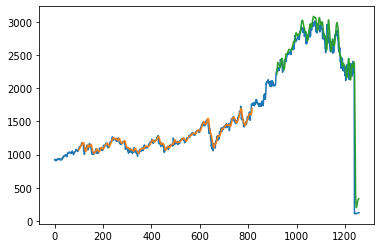

In [18]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [19]:
len(test_data)


441

In [20]:
x_input=test_data[340:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.92827479 0.91607706 0.93538783 0.93682832 0.93977461 0.94871319
 0.94454987 0.92395676 0.93117982 0.95141195 0.93367575 0.9069494
 0.90206069 0.88518396 0.85620922 0.84643179 0.85957494 0.83872055
 0.84358863 0.86125951 0.84554481 0.82279956 0.78619608 0.8111966
 0.7854535  0.75461196 0.78480373 0.75424067 0.76930217 0.77598892
 0.80655542 0.76647964 0.75900906 0.74129692 0.7516141  0.74732702
 0.74182636 0.76489133 0.75304427 0.76617023 0.73660073 0.72521779
 0.71536817 0.73155043 0.69207973 0.69148497 0.70837545 0.73933731
 0.74786334 0.74853717 0.77335204 0.75147315 0.76829486 0.76980067
 0.76985911 0.75390719 0.72990711 0.69861521 0.70079828 0.72277687
 0.69696157 0.7054154  0.73394666 0.7340773  0.73855003 0.77879769
 0.76562704 0.73777306 0.73560717 0.71577728 0.71377297 0.74681821
 0.755939   0.78407833 0.79000873 0.76493946 0.7534362  0.7351293
 0.72999306 0.73911728 0.00153675 0.00315601 0.00318351 0.0033004
 0.00100387 0.0009523  0.         0.00280534 0.0031456

In [21]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [22]:
len(df1)

1259

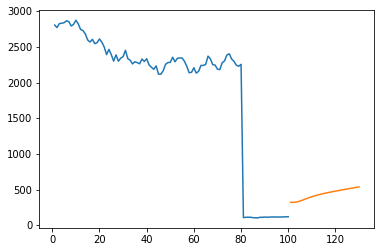

In [24]:
plt.plot(day_new,scaler.inverse_transform(df1[1159:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

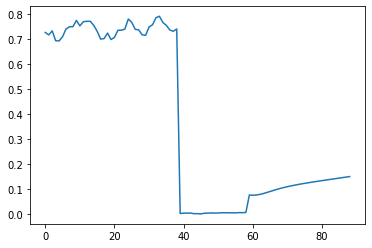

In [25]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

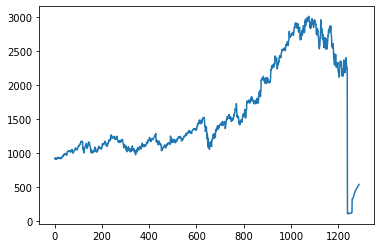

In [26]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)


In [27]:
import pickle
pickle.dump(model, open('timeseries_model.pkl','wb'))

In [ ]:
model1 = pickle.load(open('model.pkl','rb'))

tweet = "great buying opportunity"
input_size = 50

tweets_data = tf.keras.utils.pad_sequences(tweet, maxlen=input_size ,dtype="object", padding="post", truncating="post")
tweets_data = tweets_data.astype(np.float32)


